In [3]:
from sklearn.preprocessing import LabelBinarizer

In [4]:
from sklearn.metrics import classification_report 

In [6]:
from keras.models import Sequential

In [7]:
from keras.layers.core import Dense 

In [8]:
from keras.optimizers import SGD

In [9]:
from keras.datasets import cifar10

In [11]:
import matplotlib.pyplot as plt 

In [12]:
import numpy as np 

In [13]:
import argparse 

In [14]:
ap = argparse.ArgumentParser()

In [16]:
ap.add_argument("-o","--output",required=True,help="path to the output loss/accuracy plot")

_StoreAction(option_strings=['-o', '--output'], dest='output', nargs=None, const=None, default=None, type=None, choices=None, required=True, help='path to the output loss/accuracy plot', metavar=None)

In [17]:
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -o OUTPUT
ipykernel_launcher.py: error: the following arguments are required: -o/--output


SystemExit: 2

/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [18]:
print("[info] loADING CIFAR-10 data....")

[info] loADING CIFAR-10 data....


In [20]:
((trainX ,trainY),(testX,testY))=cifar10.load_data()

In [21]:
trainX = trainX.astype("float")/255.0

In [22]:
testX = testX.astype("float")/255.0

In [23]:
trainX=trainX.reshape((trainX.shape[0],3072))

In [24]:
testX = testX.reshape((testX.shape[0],3072))

In [25]:
lb = LabelBinarizer()

In [26]:
trainY = lb.fit_transform(trainY)

In [27]:
testY = lb.transform(testY)

In [28]:
labelsNames = ["airplane ","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [30]:
model = Sequential()

2023-05-04 10:04:53.334225: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 10:04:53.337064: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [32]:
model.add(Dense(1024 ,input_shape=(3072,),activation="relu"))

In [33]:
model.add(Dense(512,activation="relu"))

In [34]:
model.add(Dense(10,activation="softmax"))

In [35]:
print("[info] traning Network ")

[info] traning Network 


In [37]:
sgd = SGD(0.01)

In [39]:
model.compile(loss ="catagorical_crossentropy",optimizer=sgd,metrics=["accuracy"])

In [42]:
H = model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100,batch_size=32)

Epoch 1/100


ValueError: in user code:

    File "/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/losses.py", line 2663, in get
        return deserialize(identifier)
    File "/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/losses.py", line 2617, in deserialize
        return deserialize_keras_object(
    File "/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/saving/legacy/serialization.py", line 557, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'catagorical_crossentropy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [43]:
print("[info evaluating network]")

[info evaluating network]


In [65]:
predictions = model.predict(testX,batch_size=32)

313/313 [==============================] - 3s 10ms/step


In [68]:
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1),target_names=labelsNames))

              precision    recall  f1-score   support

   airplane        0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.08      0.05      0.06      1000
         cat       0.00      0.00      0.00      1000
        deer       0.10      0.81      0.17      1000
         dog       0.15      0.01      0.02      1000
        frog       0.05      0.00      0.01      1000
       horse       0.10      0.02      0.04      1000
        ship       0.02      0.01      0.02      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.09     10000
   macro avg       0.05      0.09      0.03     10000
weighted avg       0.05      0.09      0.03     10000



/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ccg2/miniconda3/envs/new_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [67]:
plt.style.use("ggplot")

In [53]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [56]:
plt.plot(np.arange(0,100),H.history["loss"],label="train_loss")

NameError: name 'H' is not defined

In [57]:
plt.plot(np.arange(0,100),H.history["val_loss"],label="val_loss")

NameError: name 'H' is not defined

In [58]:
plt.plot(np.arange(0,100),H.history["acc"],label="train_acc")

NameError: name 'H' is not defined

In [59]:
plt.plot(np.arange(0,100),H.history["val_acc"],label="val_acc")

NameError: name 'H' is not defined

Text(0.5, 1.0, 'traning loss accuracy ')

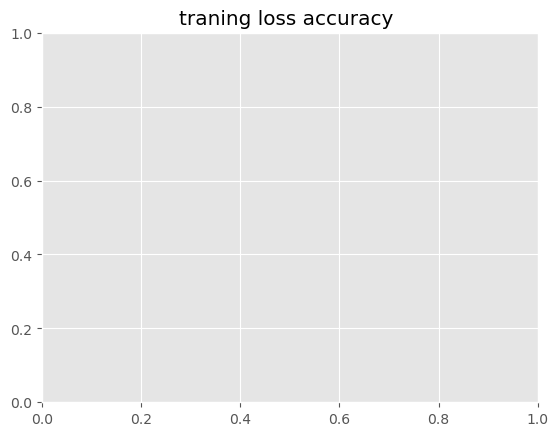

In [60]:
plt.title("traning loss accuracy ")

Text(0.5, 0, 'Epoch #')

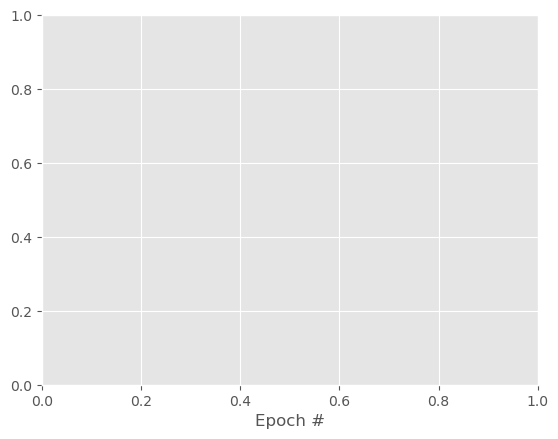

In [61]:
plt.xlabel("Epoch #")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


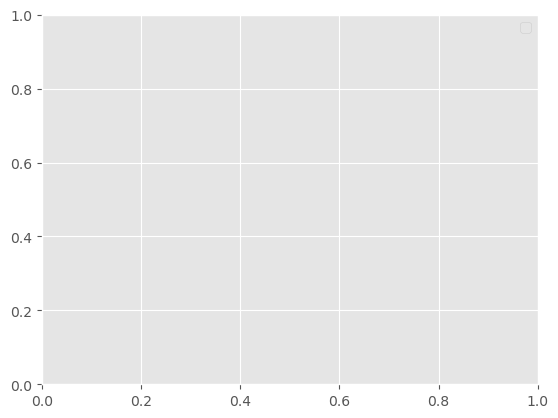

In [62]:
plt.legend()

In [63]:
plt.savefig(args["output"])

NameError: name 'args' is not defined